In [215]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_theme(context="notebook", style="darkgrid", palette="deep", font="sans-serif", font_scale=1.2, color_codes=True, rc=None)

## read data

In [237]:
data = pd.read_csv('../results-GHI-SPG.csv', names=["Date", "GHI", "SPG"], skiprows=1)
data["Date"] = data["Date"].apply(lambda x: x.split(',')[0])
print(data.head())
month_number = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}

def convert_month(date):
    assert type(date) == str, f"Expected input of type str, but got {type(date)}"
    if "-" not in date:
        month, day = date.split(' ')
        if (month in month_number):
            month = str(month_number[month])
            if len(day) == 1:
                day = f"0{day}"
            if len(month) == 1:
                month = f"0{month}"
            # print(month)
            return f"2022-{month}-{day}"
    else:
        return date
    
data["Date"] = data["Date"].apply(convert_month)
data["Date"] = pd.to_datetime(data["Date"])
print("\nNew Layout:\n")
print(data.head())

    Date  GHI      SPG
0  Jan 1    0 -1.90284
1  Jan 1    0 -1.90284
2  Jan 1    0 -1.90284
3  Jan 1    0 -1.90284
4  Jan 1    0 -1.90284

New Layout:

        Date  GHI      SPG
0 2022-01-01    0 -1.90284
1 2022-01-01    0 -1.90284
2 2022-01-01    0 -1.90284
3 2022-01-01    0 -1.90284
4 2022-01-01    0 -1.90284


In [278]:
GHI_month = data.groupby(data["Date"].dt.month)["GHI"].sum().reset_index()
days_in_month = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
GHI_month["GHI"] = (GHI_month["GHI"] * 24 / 1_000) / days_in_month
GHI_month

,Date,GHI
0,1,6.674323
1,2,18.528000
2,3,52.107871
3,4,99.380000
4,5,123.760258
5,6,139.614400
6,7,127.208516
7,8,98.132129
8,9,69.137600
9,10,24.806710


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\basti\AppData\Local\Temp\ipykernel_8288\3632274400.py:3: SyntaxWarning: invalid escape sequence '\m'
  ylabel="Daily average Horizontal insolation \n $\mathbf{H}\quad \\left[\\left(\\frac{kWh}{m^2}\\right)/d\\right]$", ax=ax, legend=None)


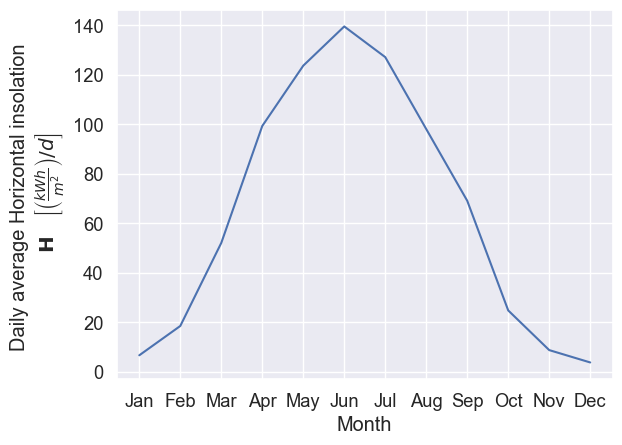

In [337]:
fig, ax = plt.subplots()
GHI_month.plot(x="Date", y="GHI", xlabel=r"Month", 
               ylabel="Daily average Horizontal insolation \n $\mathbf{H}\quad \\left[\\left(\\frac{kWh}{m^2}\\right)/d\\right]$", ax=ax, legend=None)
xtick_label = list(month_number.keys())
ax.set_xticks(range(1,13))
ax.set_xticklabels(xtick_label); 